In [1]:
import swarms
import pread as pr
import numpy as np
import matplotlib.pyplot as plt
from pread import BaraffeModelFixedTime, BaraffeModelFixedMass

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Lsun = 3.828e26 # all units in SI
Msun = 1.989e30 
Tsun = 5800
pc = 3.086e16
AU = 1.496e11
Mearth = 5.972e24
Rearth = 6.4e6
Rjup = 7.e7
Mjup = 318 * Mearth
Jansky = 1.e-26
year = 3.154e7 # seconds

time = 3.e7 * year # seconds
star = swarms.Star(L=Lsun, M=Msun, T=Tsun, d=10*pc)
earth = swarms.Planet(star, M=Mearth, R=Rearth, a=1*AU, Q=0.3)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*Mjup, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


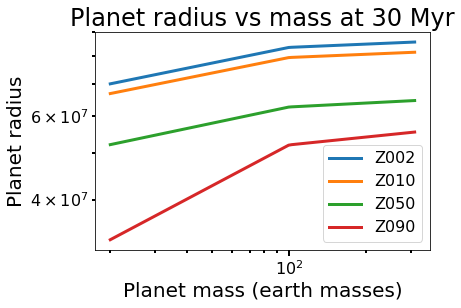

In [4]:
fig, ax = plt.subplots()

time = 3.e7*year
M = np.logspace(np.log10(20), np.log10(318), 100, endpoint=False)*Mearth
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedTime(Z, time)
    ax.plot(M/Mearth, model.R(M), lw=3, label='Z'+Z) 

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Planet mass (earth masses)')
ax.set_ylabel('Planet radius')
ax.set_title('Planet radius vs mass at 30 Myr')
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


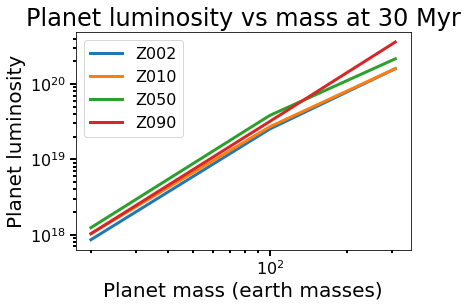

In [5]:
fig, ax = plt.subplots()

time = 3.e7*year
M = np.logspace(np.log10(20), np.log10(318), 100, endpoint=False)*Mearth
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedTime(Z, time)
    ax.plot(M/Mearth, model.L(M), lw=3, label='Z'+Z) 

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Planet mass (earth masses)')
ax.set_ylabel('Planet luminosity')
ax.set_title('Planet luminosity vs mass at 30 Myr')
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


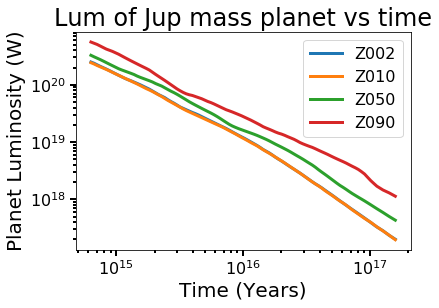

In [6]:
fig, ax = plt.subplots()

Mearth = 5.97e24
mass = 318
t = np.logspace(np.log10(2.e7*year), np.log10(5.e9*year), 100)
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedMass(Z, mass)
    ax.plot(t, model.L(t), lw=3, label='Z'+Z) 
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time (Years)')
ax.set_ylabel('Planet Luminosity (W)')
ax.set_title('Lum of Jup mass planet vs time')
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


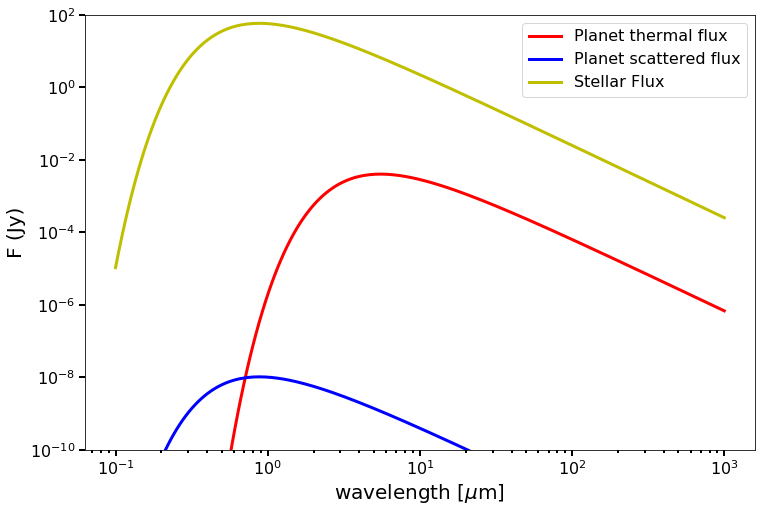

In [7]:
lambdas = np.logspace(-7, -3, 200)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

try:
    plt.style.use('paper')
except:
    pass
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, supjup.Fthermal(lambdas)/Jansky, 'r', label="Planet thermal flux")
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.legend()

In [8]:
Lsun = 3.828e26 # all units in SI
Msun = 1.989e30 
Tsun = 5800
pc = 3.086e16
AU = 1.496e11
Mearth = 5.972e24
Rearth = 6.4e6
Rjup = 7.e7
Mjup = 318 * Mearth
Jansky = 1.e-26

time = 3.e7 * year # years
star = swarms.Star(L=Lsun, M=Msun, T=Tsun, d=10*pc)
earth = swarms.Planet(star, M=Mearth, R=Rearth, a=1*AU, Q=0.3)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*Mjup, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

In [9]:
Q=0.1
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = Rjup
lamb = 1.65e-6; g=0.32

In [10]:
planet = swarms.Planet(star, M=20*Mearth, R=None, a=10*AU, Q=0.5, Z='002', age=1.e8*year)     
swarm = swarms.CollSwarm(star, planet, 1.e-2*Mearth, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=3.e7*year)

In [11]:
swarm.CRthermal(1.e-3)

-2.0099601910877016e-19